In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import folium
import requests
import json

# Dataset 1

In [42]:
df = pd.read_csv('datos/SESNSP/IDEFC_NM_ene24.csv', encoding = "ISO-8859-1")
df = df.fillna(value = 0)
df.head(3)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0.0,2.0,2.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0


In [43]:
df.dtypes

Año                         int64
Clave_Ent                   int64
Entidad                    object
Bien jurídico afectado     object
Tipo de delito             object
Subtipo de delito          object
Modalidad                  object
Enero                       int64
Febrero                   float64
Marzo                     float64
Abril                     float64
Mayo                      float64
Junio                     float64
Julio                     float64
Agosto                    float64
Septiembre                float64
Octubre                   float64
Noviembre                 float64
Diciembre                 float64
dtype: object

In [44]:
df['Enero'] = df['Enero'].astype(float)

In [45]:
df.dtypes

Año                         int64
Clave_Ent                   int64
Entidad                    object
Bien jurídico afectado     object
Tipo de delito             object
Subtipo de delito          object
Modalidad                  object
Enero                     float64
Febrero                   float64
Marzo                     float64
Abril                     float64
Mayo                      float64
Junio                     float64
Julio                     float64
Agosto                    float64
Septiembre                float64
Octubre                   float64
Noviembre                 float64
Diciembre                 float64
dtype: object

In [46]:
df['Total_delitos'] = df['Enero'] + df['Febrero'] + df['Marzo'] + df['Abril'] + df['Mayo'] + df['Junio'] + df['Julio'] + df['Agosto'] + df['Septiembre'] + df['Octubre'] + df['Noviembre'] + df['Diciembre']

In [47]:
df

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_delitos
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,18.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0.0,0.0,2.0,2.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,12.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31355,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
31356,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31357,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
31358,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.describe()

,Año,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_delitos
count,31360.000000,31360.00000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000,31360.000000
mean,2019.500000,16.50000,49.450351,43.874011,49.214541,45.594675,48.252487,48.111958,47.079273,48.423756,47.426403,49.509821,46.229050,44.344483,567.510810
std,2.872327,9.23324,190.478457,181.900277,204.118677,190.546245,201.647280,195.727306,190.517968,196.986526,192.751667,202.817262,187.899329,183.793182,2274.091559
min,2015.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,8.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.500000,16.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
75%,2022.000000,24.25000,25.000000,19.000000,22.000000,19.000000,21.000000,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000,19.000000,260.000000
max,2024.000000,32.00000,7565.000000,7888.000000,8418.000000,7916.000000,7899.000000,7386.000000,7619.000000,7955.000000,7805.000000,8421.000000,7750.000000,7851.000000,90573.000000


In [49]:
df.groupby('Entidad')['Total_delitos'].sum().sort_values(ascending = False)

Entidad
México                             3236458.0
Ciudad de México                   1944133.0
Jalisco                            1244895.0
Guanajuato                         1150030.0
Baja California                     978800.0
Nuevo León                          780979.0
Veracruz de Ignacio de la Llave     651558.0
Chihuahua                           622173.0
Puebla                              606652.0
Coahuila de Zaragoza                496118.0
Querétaro                           480496.0
Tabasco                             478584.0
Hidalgo                             408272.0
Morelos                             404350.0
San Luis Potosí                     394260.0
Michoacán de Ocampo                 387287.0
Tamaulipas                          377444.0
Quintana Roo                        356569.0
Oaxaca                              324882.0
Aguascalientes                      312390.0
Sonora                              276499.0
Guerrero                            266186.0
Du

In [50]:
Delitos_Mexico = df[df['Entidad'] == 'México'].groupby('Año')['Total_delitos'].sum().values
Delitos_CDMX = df[df['Entidad'] == 'Ciudad de México'].groupby('Año')['Total_delitos'].sum().values
Delitos_Jalisco = df[df['Entidad'] == 'Jalisco'].groupby('Año')['Total_delitos'].sum().values
Delitos_Yuc = df[df['Entidad'] == 'Yucatán'].groupby('Año')['Total_delitos'].sum().values
Delitos_Campeche = df[df['Entidad'] == 'Campeche'].groupby('Año')['Total_delitos'].sum().values
Delitos_Nayarit = df[df['Entidad'] == 'Nayarit'].groupby('Año')['Total_delitos'].sum().values
Delitos_Tlaxcala = df[df['Entidad'] == 'Tlaxcala'].groupby('Año')['Total_delitos'].sum().values

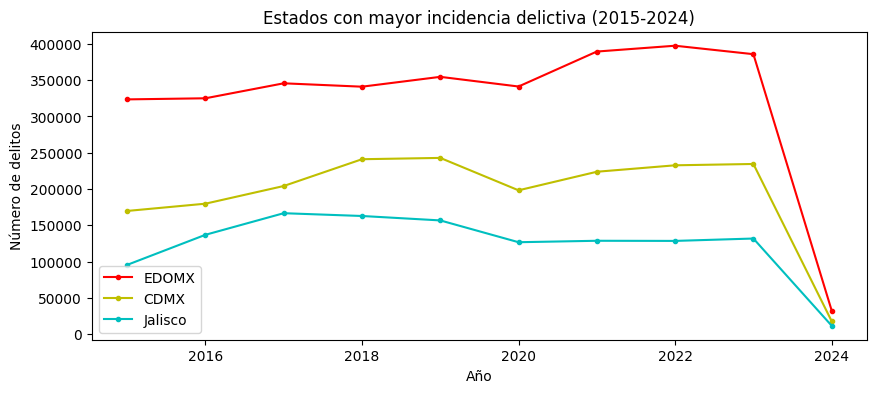

In [51]:
years = list(range(2015,2025))
plt.figure(figsize=(10,4))  
plt.plot(years, Delitos_Mexico, 'r.-',label='EDOMX')
plt.plot(years, Delitos_CDMX, 'y.-',label='CDMX')
plt.plot(years, Delitos_Jalisco, 'c.-', label='Jalisco')
plt.title('Estados con mayor incidencia delictiva (2015-2024)')  
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.legend(loc='best')
plt.show()

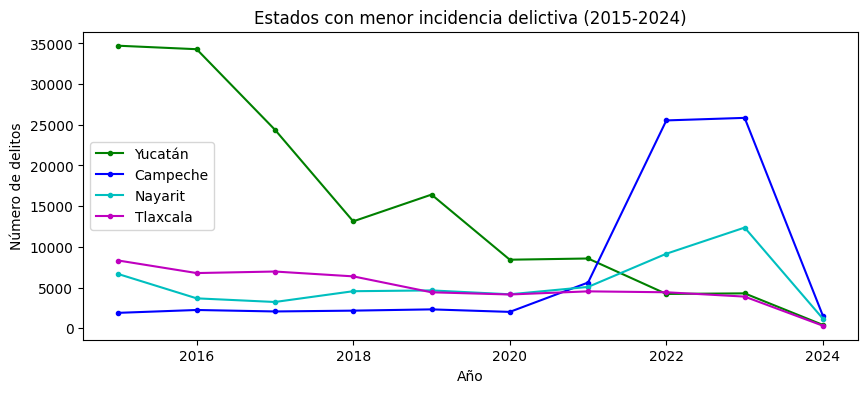

In [52]:
years = list(range(2015,2025))
plt.figure(figsize=(10,4))  
plt.plot(years, Delitos_Yuc, 'g.-',label='Yucatán')
plt.plot(years, Delitos_Campeche, 'b.-',label='Campeche')
plt.plot(years, Delitos_Nayarit, 'c.-', label='Nayarit')
plt.plot(years, Delitos_Tlaxcala, 'm.-', label='Tlaxcala')
plt.title('Estados con menor incidencia delictiva (2015-2024)')  
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.legend(loc='best')
plt.show()

In [53]:
catalogo = pd.read_csv('datos/Catalogo_entidades.csv')
catalogo.drop('ENTIDAD_FEDERATIVA',axis = 1, inplace = True)
catalogo.rename(columns={"CLAVE_ENTIDAD": "Clave_Ent", "ABREVIATURA": "Abreviatura"}, inplace = True)
catalogo

,Clave_Ent,Abreviatura
0,1,AS
1,2,BC
2,3,BS
3,4,CC
4,5,CL
5,6,CM
6,7,CS
7,8,CH
8,9,DF
9,10,DG


In [54]:
df_mapa = df.groupby('Entidad')[['Total_delitos','Clave_Ent']].sum()
df_mapa['Clave_Ent'] = df_mapa['Clave_Ent']/980
df_mapa.reset_index(inplace = True)
df_mapa

,Entidad,Total_delitos,Clave_Ent
0,Aguascalientes,312390.0,1.0
1,Baja California,978800.0,2.0
2,Baja California Sur,198436.0,3.0
3,Campeche,71167.0,4.0
4,Chiapas,187862.0,7.0
5,Chihuahua,622173.0,8.0
6,Ciudad de México,1944133.0,9.0
7,Coahuila de Zaragoza,496118.0,5.0
8,Colima,207864.0,6.0
9,Durango,264065.0,10.0


In [55]:
df_mapa = pd.merge( df_mapa, catalogo, on = 'Clave_Ent' )
df_mapa

,Entidad,Total_delitos,Clave_Ent,Abreviatura
0,Aguascalientes,312390.0,1.0,AS
1,Baja California,978800.0,2.0,BC
2,Baja California Sur,198436.0,3.0,BS
3,Campeche,71167.0,4.0,CC
4,Chiapas,187862.0,7.0,CS
5,Chihuahua,622173.0,8.0,CH
6,Ciudad de México,1944133.0,9.0,DF
7,Coahuila de Zaragoza,496118.0,5.0,CL
8,Colima,207864.0,6.0,CM
9,Durango,264065.0,10.0,DG


In [56]:
estados_geo = 'datos/estados_mx_geo.json'

In [57]:
mapa = folium.Map(location=[24, -102],zoom_start=5)

folium.Choropleth(
    geo_data = estados_geo,
    data = df_mapa,
    columns = ['Abreviatura','Total_delitos'],
    key_on = 'feature.id',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    legend_name = 'Incidencia delictiva en Mexico'   
).add_to(mapa)

mapa

# Dataset 2

In [58]:
df2 = pd.read_csv('datos/SESNSP/IDEFC_nov2023.csv', encoding = "ISO-8859-1")
df2 = df2.fillna(value = 0)
df2.head(3)

,AÑO,INEGI,ENTIDAD,MODALIDAD,TIPO,SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,17,17,17,17,17,17,32,0,38,28,22,31
1,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DAÑO EN PROPIEDAD AJENA,DAÑO EN PROPIEDAD AJENA,45,45,45,45,45,45,108,40,117,38,73,133
2,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,EXTORSION,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
df2.dtypes

AÑO            int64
INEGI          int64
ENTIDAD       object
MODALIDAD     object
TIPO          object
SUBTIPO       object
ENERO          int64
FEBRERO        int64
MARZO          int64
ABRIL          int64
MAYO           int64
JUNIO          int64
JULIO          int64
AGOSTO         int64
SEPTIEMBRE     int64
OCTUBRE        int64
NOVIEMBRE      int64
DICIEMBRE      int64
dtype: object

In [60]:
df2['Total_delitos'] = df2['ENERO'] + df2['FEBRERO'] + df2['MARZO'] + df2['ABRIL'] + df2['MAYO'] + df2['JUNIO'] + df2['JULIO'] + df2['AGOSTO'] + df2['SEPTIEMBRE'] + df2['OCTUBRE'] + df2['NOVIEMBRE'] + df2['DICIEMBRE']

In [61]:
df2

,AÑO,INEGI,ENTIDAD,MODALIDAD,TIPO,SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,Total_delitos
0,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,17,17,17,17,17,17,32,0,38,28,22,31,253
1,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DAÑO EN PROPIEDAD AJENA,DAÑO EN PROPIEDAD AJENA,45,45,45,45,45,45,108,40,117,38,73,133,779
2,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,EXTORSION,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,FRAUDE,FRAUDE,9,9,9,9,9,9,52,0,55,51,42,44,298
4,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44347,2017,32,ZACATECAS,DELITOS SEXUALES (VIOLACION),VIOLACION,VIOLACION,14,18,15,9,22,22,8,22,15,20,15,12,192
44348,2017,32,ZACATECAS,OTROS DELITOS,AMENAZAS,AMENAZAS,45,51,53,35,54,61,37,42,42,57,55,33,565
44349,2017,32,ZACATECAS,OTROS DELITOS,ESTUPRO,ESTUPRO,0,0,0,0,0,0,0,0,0,0,0,0,0
44350,2017,32,ZACATECAS,OTROS DELITOS,OTROS SEXUALES,OTROS SEXUALES,11,15,17,6,15,25,23,18,13,16,12,5,176


In [62]:
df2.groupby('ENTIDAD')['Total_delitos'].sum().sort_values(ascending = False)

ENTIDAD
MEXICO                 5138162
CIUDAD DE MEXICO       3859452
BAJA CALIFORNIA        2397298
JALISCO                1922749
GUANAJUATO             1558367
VERACRUZ               1333091
CHIHUAHUA              1331910
PUEBLA                 1304001
NUEVO LEON             1223887
TABASCO                1001499
TAMAULIPAS              987228
YUCATAN                 940396
MORELOS                 825871
OAXACA                  794842
COAHUILA                784885
SAN LUIS POTOSI         775209
MICHOACAN               680598
SONORA                  658161
GUERRERO                642000
HIDALGO                 612145
CHIAPAS                 592377
QUINTANA ROO            563276
SINALOA                 522079
QUERETARO               499252
DURANGO                 412891
BAJA CALIFORNIA SUR     365911
AGUASCALIENTES          358932
ZACATECAS               292819
COLIMA                  202186
NAYARIT                 170560
TLAXCALA                145851
CAMPECHE                 70208


In [63]:
Delitos_MEXICO = df2[df2['ENTIDAD'] == 'MEXICO'].groupby('AÑO')['Total_delitos'].sum().values
Delitos_CDMX = df2[df2['ENTIDAD'] == 'CIUDAD DE MEXICO'].groupby('AÑO')['Total_delitos'].sum().values
Delitos_BC = df2[df2['ENTIDAD'] == 'BAJA CALIFORNIA'].groupby('AÑO')['Total_delitos'].sum().values
Delitos_YUC = df2[df2['ENTIDAD'] == 'YUCATAN'].groupby('AÑO')['Total_delitos'].sum().values
Delitos_NAYARIT = df2[df2['ENTIDAD'] == 'NAYARIT'].groupby('AÑO')['Total_delitos'].sum().values
Delitos_TLAXCALA = df2[df2['ENTIDAD'] == 'TLAXCALA'].groupby('AÑO')['Total_delitos'].sum().values
Delitos_CAMPECHE = df2[df2['ENTIDAD'] == 'CAMPECHE'].groupby('AÑO')['Total_delitos'].sum().values

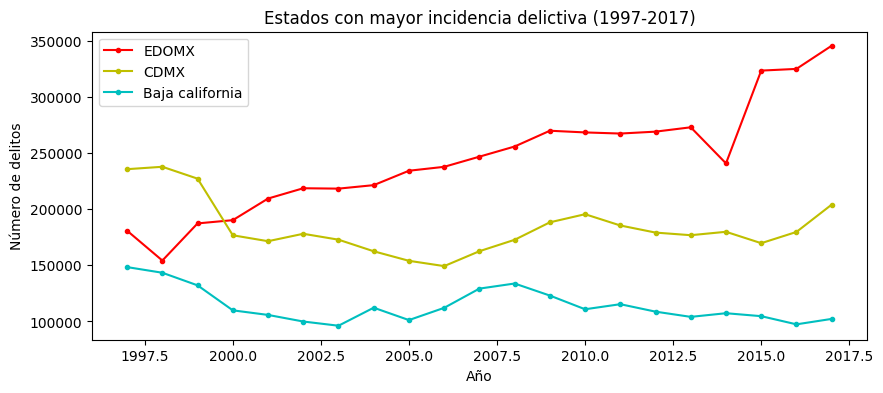

In [64]:
years = list(range(1997,2018))
plt.figure(figsize=(10,4))  
plt.plot(years, Delitos_MEXICO, 'r.-',label='EDOMX')
plt.plot(years, Delitos_CDMX, 'y.-',label='CDMX')
plt.plot(years, Delitos_BC, 'c.-', label='Baja california')
plt.title('Estados con mayor incidencia delictiva (1997-2017)')  
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.legend(loc='best')
plt.show()

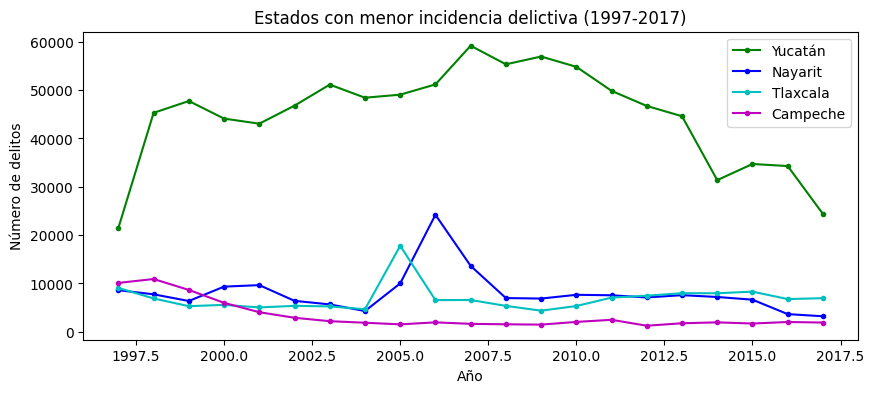

In [65]:
years = list(range(1997,2018))
plt.figure(figsize=(10,4))  
plt.plot(years, Delitos_YUC, 'g.-',label='Yucatán')
plt.plot(years, Delitos_NAYARIT, 'b.-',label='Nayarit')
plt.plot(years, Delitos_TLAXCALA, 'c.-', label='Tlaxcala')
plt.plot(years, Delitos_CAMPECHE, 'm.-', label='Campeche')
plt.title('Estados con menor incidencia delictiva (1997-2017)')  
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.legend(loc='best')
plt.show()

# Comparacion de clasificacion DS1 Y DS2

## Dataset 1

In [66]:
len(df['Bien jurídico afectado'].unique())

7

In [72]:
df['Bien jurídico afectado'].unique()

array(['La vida y la Integridad corporal', 'Libertad personal',
       'La libertad y la seguridad sexual', 'El patrimonio', 'La familia',
       'La sociedad',
       'Otros bienes jurídicos afectados (del fuero común)'], dtype=object)

In [69]:
len(df['Tipo de delito'].unique())

40

In [73]:
df['Tipo de delito'].unique()

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

In [70]:
len(df['Subtipo de delito'].unique())

55

In [74]:
df['Subtipo de delito'].unique()

array(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas',
       'Lesiones culposas', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo a casa habitación', 'Robo de vehículo automotor',
       'Robo de autopartes', 'Robo a transportista',
       'Robo a transeúnte en vía pública',
       'Robo a transeúnte en espacio abierto al público',
       'Robo en transporte público individual',
       'Robo en transporte público colectivo',
       'Robo en transporte individual', 'Robo a institución bancaria',
       'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria',
       'Otros robos', 'Fraude', 'Abuso

In [68]:
len(df['Modalidad'].unique())

59

In [76]:
df['Modalidad'].unique()

array(['Con arma de fuego', 'Con arma blanca', 'Con otro elemento',
       'No especificado', 'En accidente de tránsito', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro extorsivo', 'Secuestro con calidad de rehén',
       'Secuestro para causar daño', 'Secuestro exprés',
       'Otro tipo de secuestros', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Con violencia', 'Sin violencia',
       'Robo de coche de 4 ruedas Con violencia',
       'Robo de coche de 4 ruedas Sin violencia',
       'Robo de motocicleta Con violencia',
       'Robo de motocicleta Sin violencia',
       'Robo de embarcaciones pequeñas y grandes Con violencia',
       'Robo de embarcaciones pequeñas y grand

## Dataset 2

In [77]:
len(df2['MODALIDAD'].unique())

10

In [80]:
df2['MODALIDAD'].unique()

array(['DELITOS PATRIMONIALES', 'DELITOS SEXUALES (VIOLACION)',
       'HOMICIDIOS', 'LESIONES', 'OTROS DELITOS',
       'PRIV. DE LA LIBERTAD (SECUESTRO)', 'ROBO COMUN',
       'ROBO DE GANADO (ABIGEATO)', 'ROBO EN INSTITUCIONES BANCARIAS',
       'ROBO EN CARRETERAS'], dtype=object)

In [78]:
len(df2['TIPO'].unique())

18

In [81]:
df2['TIPO'].unique()

array(['ABUSO DE CONFIANZA', 'DAÑO EN PROPIEDAD AJENA', 'EXTORSION',
       'FRAUDE', 'DESPOJO', 'VIOLACION', 'DOLOSOS', 'CULPOSOS',
       'CULPOSAS', 'AMENAZAS', 'ESTUPRO', 'OTROS SEXUALES',
       'RESTO DE LOS DELITOS (OTROS)', 'SECUESTRO', 'CON VIOLENCIA',
       'SIN VIOLENCIA', 'ABIGEATO', 'DOLOSAS'], dtype=object)

In [79]:
len(df2['SUBTIPO'].unique())

29

In [82]:
df2['SUBTIPO'].unique()

array(['ABUSO DE CONFIANZA', 'DAÑO EN PROPIEDAD AJENA', 'EXTORSION',
       'FRAUDE', 'CON VIOLENCIA', 'SIN VIOLENCIA', 'SIN DATOS',
       'VIOLACION', 'CON ARMA DE FUEGO', 'CON ARMA BLANCA', 'OTROS',
       'AMENAZAS', 'ESTUPRO', 'OTROS SEXUALES',
       'RESTO DE LOS DELITOS (OTROS)', 'SECUESTRO', 'A CASA HABITACION',
       'A NEGOCIO', 'DE VEHICULOS', 'A TRANSPORTISTAS', 'A TRANSEUNTES',
       'ABIGEATO', 'A BANCOS', 'A CASA DE BOLSA', 'A CASA DE CAMBIO',
       'A EMPRESA DE TRASLADO DE VALORES', 'A CAMIONES DE CARGA',
       'A AUTOBUSES', 'A VEHICULOS PARTICULARES'], dtype=object)